In [254]:
import keras
import tensorflow as tf
%matplotlib inline
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [255]:
print("python:{}, keras:{}, tensorflow: {}".format(sys.version, keras.__version__, tf.__version__))

python:3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)], keras:2.0.1, tensorflow: 1.0.1


In [256]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

in_out_neurons = 1
hidden_neurons = 30

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [257]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30)                3840      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 31        
_________________________________________________________________
activation_18 (Activation)   (None, 1)                 0         
Total params: 3,871.0
Trainable params: 3,871.0
Non-trainable params: 0.0
_________________________________________________________________


[-0.21601479 -0.24549033  0.06644815 ..., -0.03569347 -0.01505159
  0.02729944]


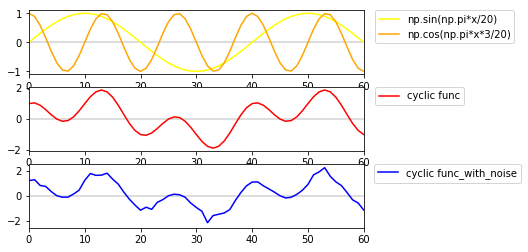

'\na = np.arange(1,10,1)\nb = np.arange(10,1,-1)\ndata = np.hstack((a, b))\ndata = np.tile(data, 100)\ndata_noized = data * (1 + random()) * 0.5\n'

In [258]:
from random import random
import numpy as np

x = np.arange(0, 2000)
data_a = np.sin(np.pi*x/20)
data_b = np.cos(np.pi*x*3/20)
data = data_a + data_b
data_noised = [d * (0.75+0.5*random()) for d in data]

%matplotlib inline
import matplotlib.pyplot as plt

# 新規のウィンドウを描画
fig = plt.figure()
# サブプロットを追加
ax1 = fig.add_subplot(3,1,1)
ax1.axhline(y=0, color='lightgrey')
ax1.plot(data_a, color='yellow', label="np.sin(np.pi*x/20)")
ax1.plot(data_b, color='orange', label="np.cos(np.pi*x*3/20)")
plt.xlim(0,60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.45, 1))

ax3 = fig.add_subplot(3,1,2)
ax3.axhline(y=0, color='lightgrey')
ax3.plot(data, label="cyclic func", color="red")
#ax3.plot(data_noised, label="cyclic func")
plt.xlim(0, 60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.30, 1))
#plt.show()
#plt.savefig("image.png")

ax4 = fig.add_subplot(3,1,3)
ax4.axhline(y=0, color='lightgrey')
ax4.plot(data_noised, label="cyclic func_with_noise", color="blue")
plt.xlim(0, 60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.47, 1))
plt.show()
plt.savefig("image2.png")

# データ作成
'''
a = np.arange(1,10,1)
b = np.arange(10,1,-1)
data = np.hstack((a, b))
data = np.tile(data, 100)
data_noized = data * (1 + random()) * 0.5
'''

In [259]:
import numpy as np

def load_data(data, n_prev = 100):  
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data[i:i+n_prev])
        docY.append(data[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(data, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(data) * (1 - test_size))

    X_train, y_train = load_data(data[0:ntrn])
    X_test, y_test = load_data(data[ntrn:])

    print(X_train.shape)
    print(y_train.shape)

    X_train = X_train[:, :, np.newaxis]
    y_train = y_train[:, np.newaxis]
    X_test = X_test[:, :, np.newaxis]
    y_test = y_test[:, np.newaxis]

    print(X_train.shape)

    return (X_train, y_train), (X_test, y_test)

In [260]:
(X_train, y_train), (X_test, y_test) = train_test_split(data_noised)  # retrieve data
(X_train_wn, y_train_wn), (X_test_wn, y_test_wn) = train_test_split(data)

# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
hist = model.fit(X_train, y_train, batch_size=450, epochs=120, validation_split=0.05)  

(1700, 100)
(1700,)
(1700, 100, 1)
(1700, 100)
(1700,)
(1700, 100, 1)
Train on 1615 samples, validate on 85 samples
Epoch 1/120
1615/1615 [==============================] - 1s - loss: 1.1868 - acc: 6.1920e-04 - val_loss: 1.0689 - val_acc: 0.0000e+00
Epoch 2/120
1615/1615 [==============================] - 0s - loss: 1.0853 - acc: 6.1920e-04 - val_loss: 1.0006 - val_acc: 0.0000e+00
Epoch 3/120
1615/1615 [==============================] - 0s - loss: 1.0203 - acc: 6.1920e-04 - val_loss: 0.9436 - val_acc: 0.0000e+00

In [261]:
print(X_test.shape)
predicted = model.predict(X_test)  
print(predicted.shape)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
print(rmse)

(100, 100, 1)
(100, 1)
[ 0.1526323]


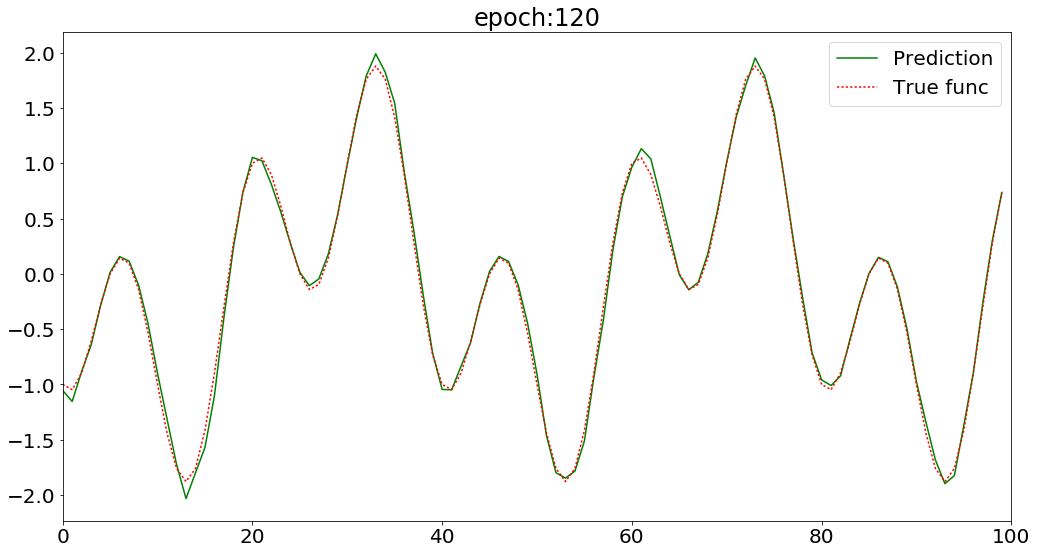

In [262]:
plt.rcParams["figure.figsize"] = (17, 9)
plt.rcParams["font.size"] = 20
plt.plot(np.arange(0, 100), predicted[:100][:,0],color="green")
#plt.plot(np.arange(0, 100), y_test[:100][:,0],":", color="blue")
plt.plot(np.arange(0, 100), y_test_wn[:100][:,0], ":", color="red")
plt.legend(["Prediction", "True func"])
plt.xlim(0,100)
plt.title("epoch:120")
plt.show()

<class 'dict'>
<class 'dict'>
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


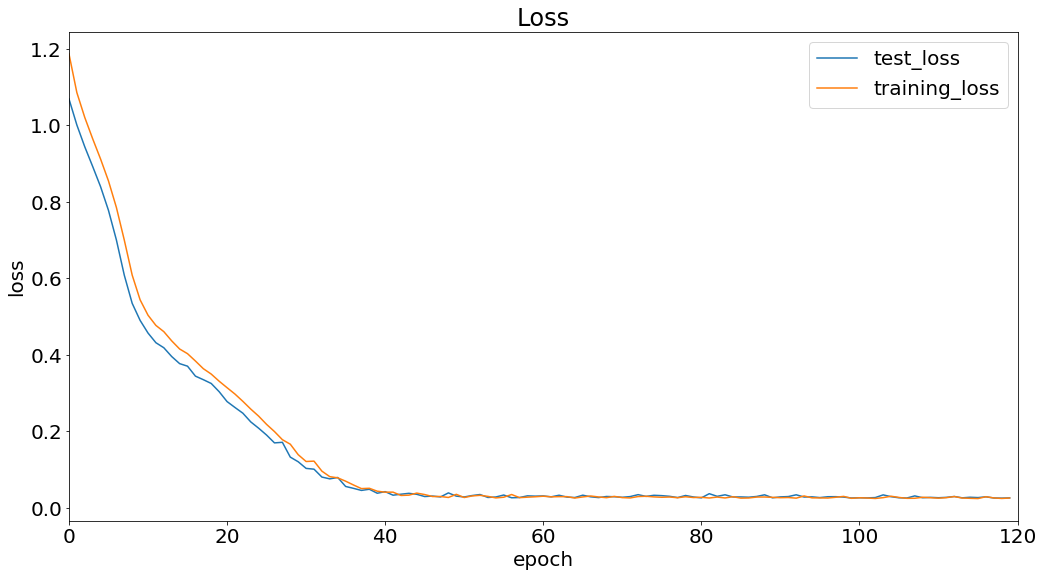

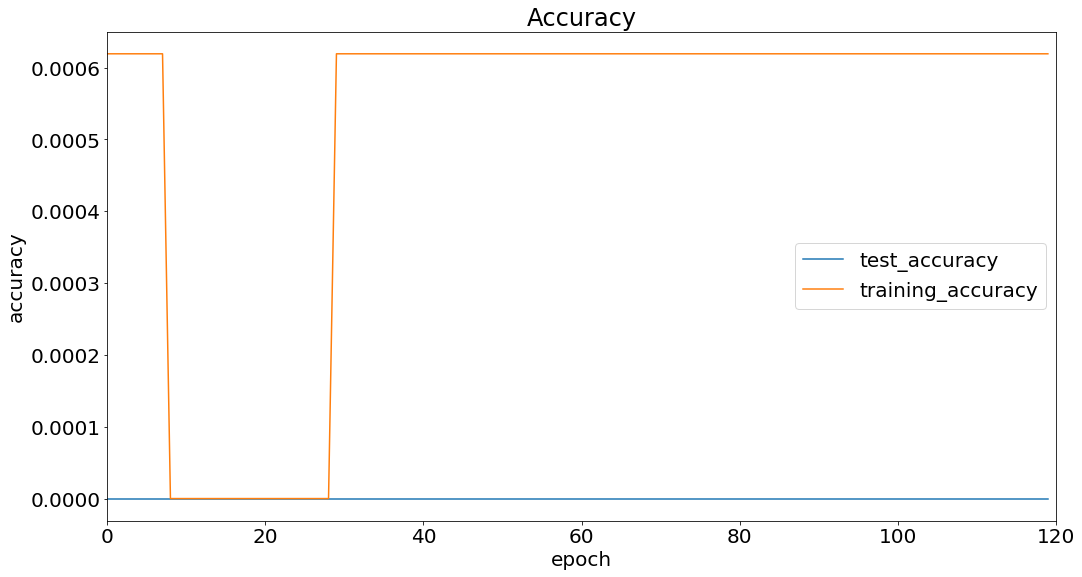

In [265]:
print(type(hist.history))
hist2 = hist.history
print(type(hist2))
print(hist2.keys())

fig1 = plt.figure()

plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(0, 120)
plt.plot(hist2['val_loss'], label="test_loss")
plt.plot(hist2['loss'], label="training_loss")
plt.legend()
plt.show()

fig2 = plt.figure()

plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(0, 120)
plt.plot(hist2['val_acc'], label="test_accuracy")
plt.plot(hist2['acc'], label="training_accuracy")
plt.legend()
plt.show()